<img src='https://www.rc.colorado.edu/sites/all/themes/research/logo.png' style="height:75px">

# Plotting the Walrus Data

In [9]:
import os
import pandas as  pd
import numpy as np

In [10]:
filename = os.path.join('Walrus_Data','Walruses.csv')
df = pd.read_csv(filename, index_col='DateTimeUTC', parse_dates=True, 
                 thousands=',')
df.head(5)

,Walrus,Xcoord,Ycoord,Behav,Longitude,Latitude
DateTimeUTC,,,,,,
2008-05-31 19:25:00,271,95616.95,-528324.60,1.00900,-167.956095,65.248715
2008-06-01 03:24:00,271,84741.71,-511653.75,1.00050,-168.177987,65.401217
2008-06-01 11:24:00,271,71834.45,-491176.95,1.00625,-168.444360,65.587969
2008-06-01 19:24:00,271,65275.80,-478935.62,1.02025,-168.580284,65.699143
2008-06-02 03:24:00,271,69343.24,-473948.91,1.00775,-168.489215,65.742984


In [11]:
w271 = df.ix[df.Walrus == 271]
w281 = df.ix[df.Walrus == 281]
w322 = df.ix[df.Walrus == 322]

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
#?plt.subplot

## Plotting the walrus behavior in 3 plots

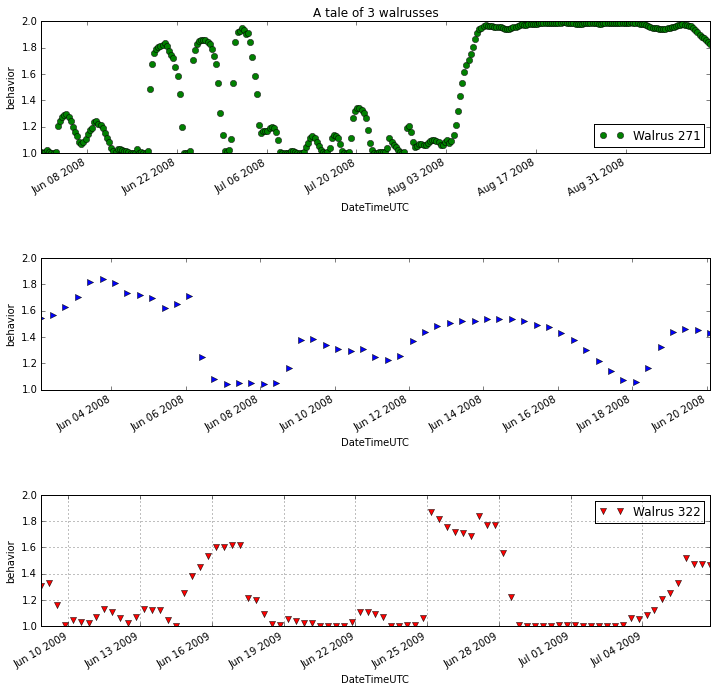

In [35]:
fig, axes = plt.subplots(nrows=3, figsize=(12,12))
#txt = fig.text(0.3, 0.95, 'Walrus behavior Example', fontsize = 18)
plt.subplots_adjust(wspace=0.5, hspace=0.8)
plt.subplot(311)
plt.title('A tale of 3 walrusses')
plt.grid(True)
plt.ylabel('behavior')
w271['Behav'].plot(style='go', label='Walrus 271', legend=True)
plt.subplot(312)
plt.ylabel('behavior')
plt.ylim((1.0, 2.0))
w281['Behav'].plot(style='b>', label='Walrus 281', legend=False)
plt.subplot(313)
plt.ylabel('behavior')
plt.ylim((1.0, 2.0))
w322['Behav'].plot(style='rv', label='Walrus 322', legend=True)
plt.grid()
plt.show()

### Plotting the walrus behavior

Several steps:
1. Create a map centered around the region
2. Draw coastlines
3. Draw countries
4. Fill oceans and coastline
5. Draw the oberservations of the walrus on map

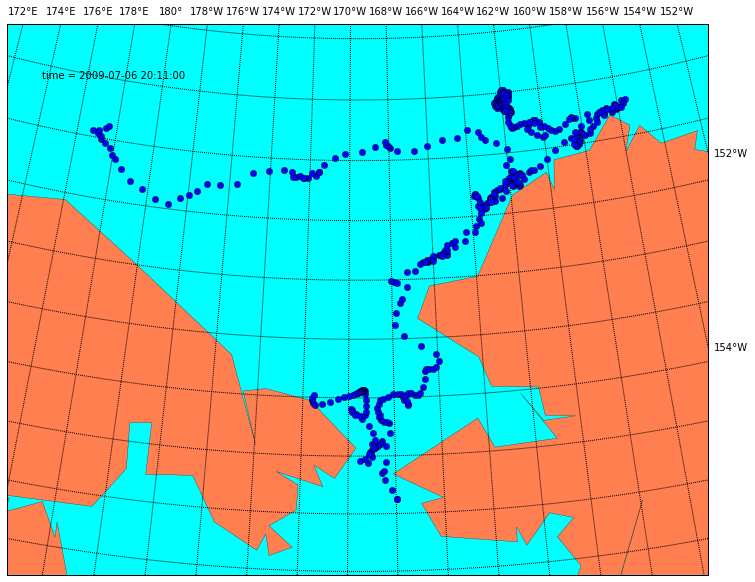

In [68]:
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation

lons = w281.Longitude.values
lats = w281.Latitude.values
lons_c=np.average(lons)
lats_c=np.average(lats)
#map = Basemap(projection='mill',llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80)
map = Basemap(width=1400000,height=1100000,projection='lcc', resolution='c',
              lat_1=45.,lat_2=55.,lat_0=lats_c+2,lon_0=lons_c)
fig=plt.figure(figsize=(12,9))
ax = fig.add_axes([0.05,0.05,0.9,0.85])
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# create a grid 
# draw lat/lon grid lines every 2 degrees.
map.drawmeridians(np.arange(0,360,2), labels=[False, True, True, False])
map.drawparallels(np.arange(-90,90,1), lables=[True, False, False, True])

# 
#wt = df.ix[0]
xx=[]
yy=[]
x, y = map(wt.Longitude,wt.Latitude)
xx.append(x)
yy.append(y)
point, = ax.plot([],[],'bo',label=wt.Walrus)

time_template = 'time = %s'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    point.set_data([], [])
    time_text.set_text('')
    return point,

def animate(i):
    wt = df.ix[i]
    lons, lats = wt.Longitude, wt.Latitude  
    x, y = map(lons, lats)
    xx.append(x)
    yy.append(y)
    point.set_data(xx, yy)
    time_text.set_text(time_template%(df.index[i]))
    return point,

anim = animation.FuncAnimation(fig, animate, frames=len(df),
                               init_func=init, 
                               blit=False)
anim.save('walrus_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


# call our new function to display the animation

plt.show()

In [63]:
df.ix[0]

Walrus          271.000000
Xcoord        95616.950000
Ycoord      -528324.600000
Behav             1.009000
Longitude      -167.956095
Latitude         65.248715
Name: 2008-05-31 19:25:00, dtype: float64

In [64]:
df.index[0]

Timestamp('2008-05-31 19:25:00')

In [66]:
print(df.index[0])

2008-05-31 19:25:00
